## Trabajo práctico N°3

Alumna: Clara Bureu

#### Importo las librerías

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

### Parte 1

In [2]:
img1 = cv.imread('images/coca_logo_1.png')
img2 = cv.imread('images/coca_logo_2.png')
img3 = cv.imread('images/coca_retro_1.png')
img4 = cv.imread('images/coca_retro_2.png')
img5 = cv.imread('images/COCA-COLA-LOGO.jpg')
img6 = cv.imread('images/logo_1.png')
img_tp = cv.imread('template/pattern.png')

img_coca = [img1, img2, img3, img4, img5, img6]

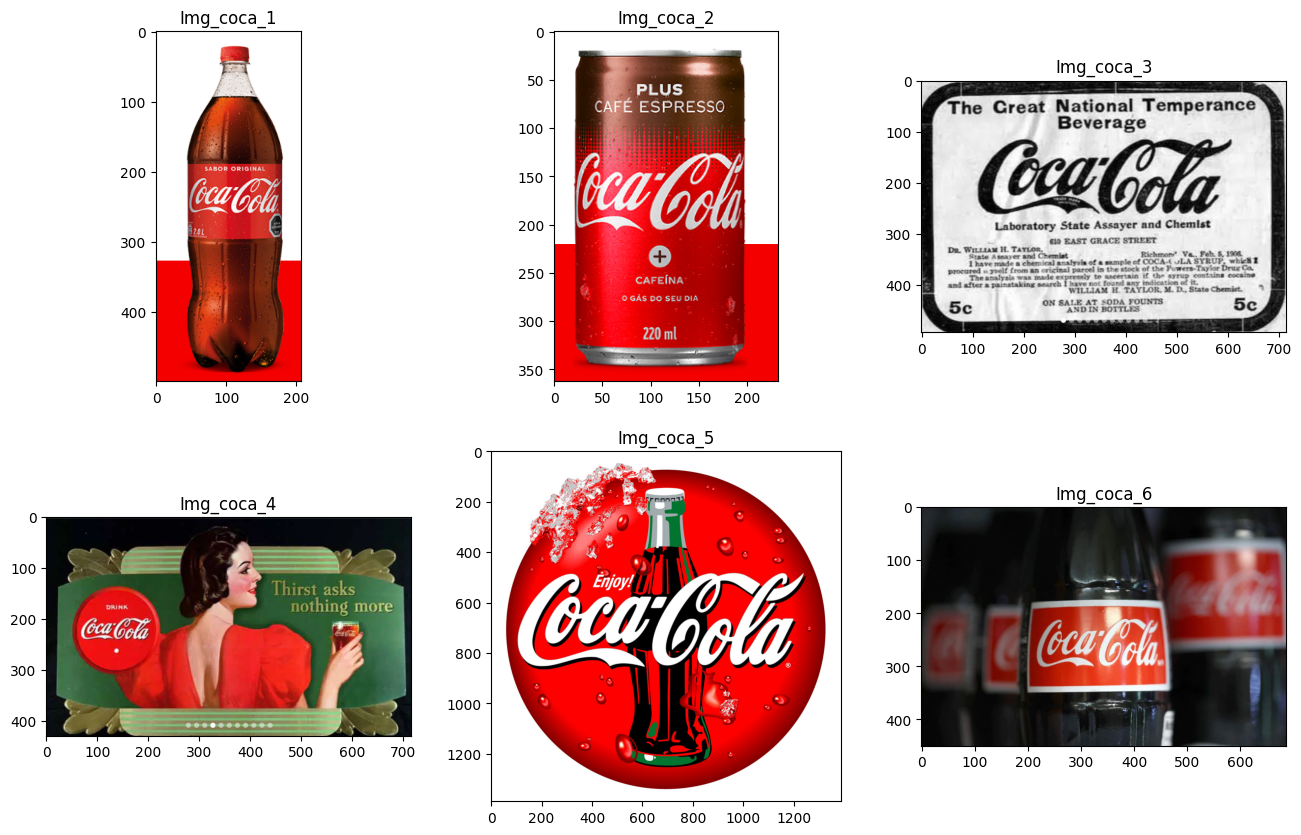

In [3]:
fig, axs = plt.subplots(2, 3, figsize=(16, 10))

for i, img in enumerate(img_coca):
    if img is not None and not img.size == 0:
        imgRGB = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        plt.subplot(2, 3, i + 1)
        plt.imshow(imgRGB)
        plt.title(f'Img_coca_{i + 1}')
    else:
        print(f"Error: Img_coca_{i + 1} is empty or not loaded correctly.")


Text(0.5, 1.0, 'template_Canny')

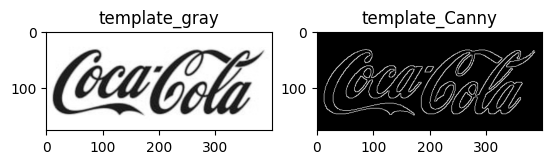

In [4]:
plt.subplot(1,2,1)
template_gray = cv.cvtColor(img_tp, cv.COLOR_BGR2GRAY)
plt.imshow(template_gray, cmap='gray')
plt.title('template_gray')

plt.subplot(1,2,2)
template = cv.Canny(template_gray, 50, 200)
w, h = template.shape[:2]
plt.imshow(cv.cvtColor(template, cv.COLOR_BGR2RGB))
plt.title('template_Canny')

In [5]:
for i, img in enumerate(img_coca):  
    image_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # Obtener las dimensiones
    h, w = template.shape
    h_img, w_img = image_gray.shape

    print(h, w, h_img, w_img)

175 400 500 207
175 400 363 233
175 400 493 715
175 400 429 715
175 400 1389 1389
175 400 450 687


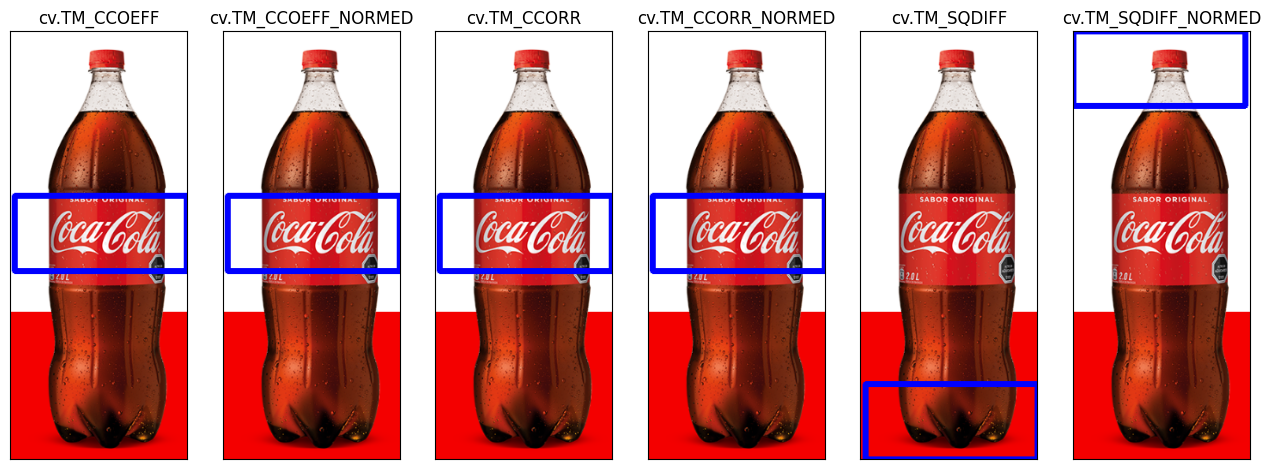

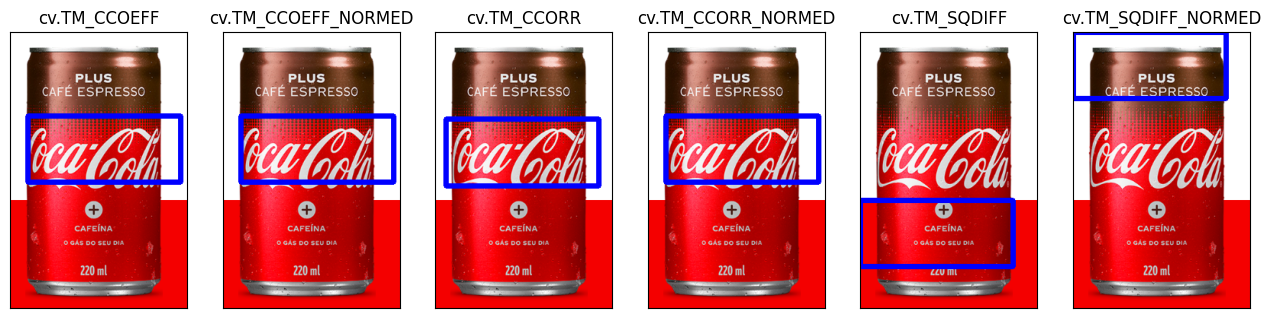

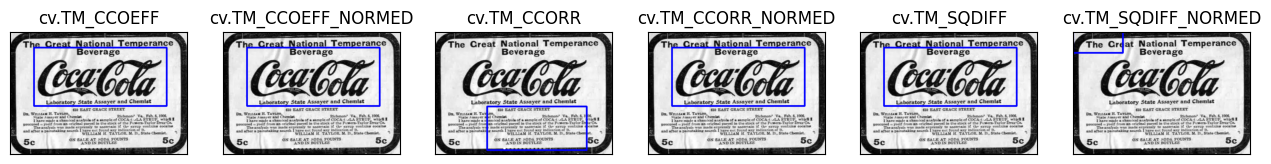

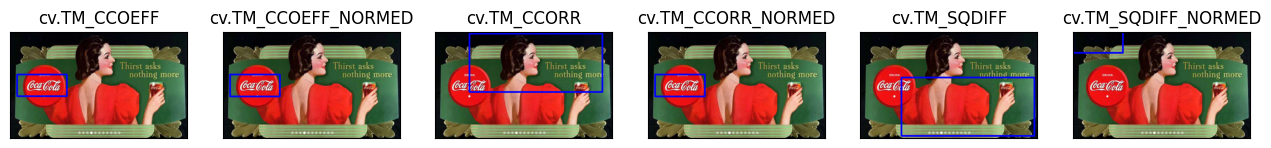

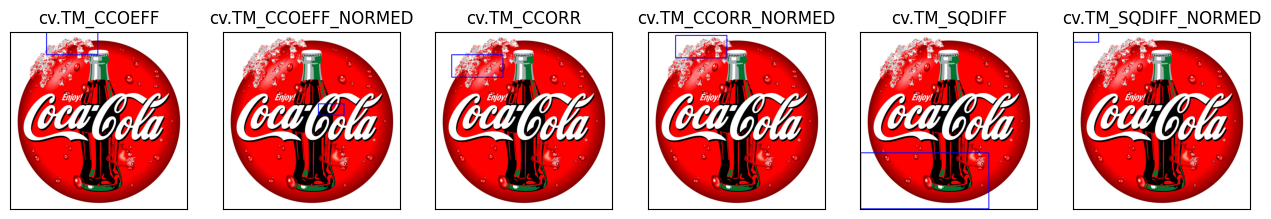

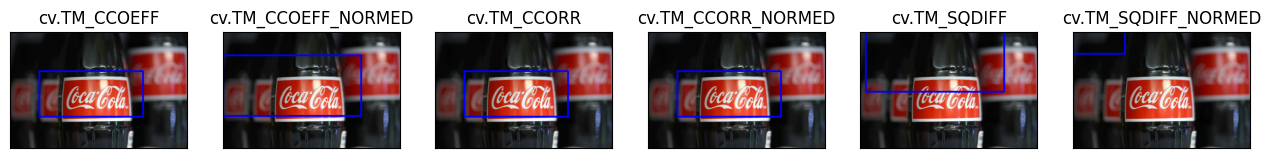

In [11]:
#scales = [0.25, 0.4, 0.5, 0.75, 1, 2]
scales = [2, 1, 0.75, 0.5, 0.4]
max_value = []
max_local = []
used_scales = []

methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
for i, img in enumerate(img_coca):
    fig, axs = plt.subplots(1, 6, figsize=(16, 10))
    for j, meth in enumerate(methods):
        h_rz = h_img  
        w_rz = w_img  
        max_value = []
        max_local = []
        min_value = []
        min_local = []
        used_scales = []
        results = [] 
        method = eval(meth)
        for scale in scales:
            img_rz = cv.resize(img, (int(img.shape[1] * scale), int(img.shape[0] * scale)))
            w_rz = int(img_rz.shape[1])
            h_rz = int(img_rz.shape[0])
            if h_rz < h or w_rz < w:
                continue

            image_gray = cv.cvtColor(img_rz, cv.COLOR_BGR2GRAY)
            img_salida = image_gray.copy()

            img_canny = cv.Canny(img_salida, 100, 200)
            
            res = cv.matchTemplate(img_canny, template, method)
            min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
            if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
                min_value.append(min_val)
                min_local.append(min_loc)
            else:
                max_value.append(max_val)
                max_local.append(max_loc)
            used_scales.append(scale)
            results.append(res)

        id = np.argmax(min_value) if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED] else np.argmax(max_value)
        local = min_local[id] if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED] else max_local[id]
        x, y = np.divide(local, used_scales[id])

        h_rectangle, w_rectangle = np.divide((h, w), used_scales[id])
        bottom_right = (int(x + w_rectangle), int(y + h_rectangle))
        top_left = (int(x), int(y))
        
        img_plot = img.copy()
        cv.rectangle(img_plot, top_left, bottom_right, (255, 0, 0), 5)
        
        plt.subplot(1, 6, j + 1)
        plt.imshow(cv.cvtColor(img_plot, cv.COLOR_BGR2RGB))
        plt.title(meth), plt.xticks([]), plt.yticks([])


Analizando los resultados con diferentes métodos de coincidencia de plantillas (template matching) y una variedad de escalas, podemos concluir que el método TM_CCOEFF es el que mejor se adapta al template utilizado con las imágenes analizadas. Luego de varias pruebas no se pudo detectar el logo en la imagen 5, asumiendo que es un problema de escalas se decidió analizar la imagen por separado.

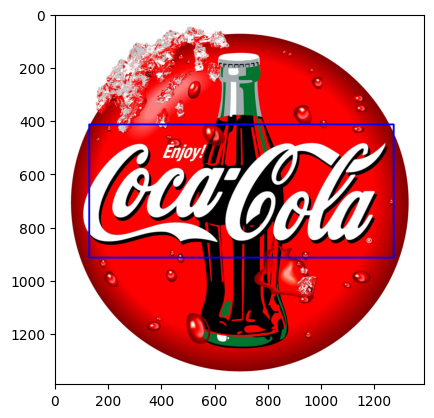

In [29]:
scales = [0.35]
img = img5
max_value = []
max_local = []
min_value = []
min_local = []
used_scales = []
results = [] 

for scale in scales:
    img_rz = cv.resize(img, (int(img.shape[1] * scale), int(img.shape[0] * scale)))
    w_rz = int(img_rz.shape[1])
    h_rz = int(img_rz.shape[0])
    if h_rz < h or w_rz < w:
        continue

    image_gray = cv.cvtColor(img_rz, cv.COLOR_BGR2GRAY)
    img_salida = image_gray.copy()
    img_canny = cv.Canny(img_salida, 100, 200)
    
    res = cv.matchTemplate(img_canny, template, cv.TM_CCOEFF)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        min_value.append(min_val)
        min_local.append(min_loc)
    else:
        max_value.append(max_val)
        max_local.append(max_loc)
    used_scales.append(scale)
    results.append(res)

id = np.argmax(min_value) if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED] else np.argmax(max_value)
local = min_local[id] if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED] else max_local[id]
x, y = np.divide(local, used_scales[id])

h_rectangle, w_rectangle = np.divide((h, w), used_scales[id])
bottom_right = (int(x + w_rectangle), int(y + h_rectangle))
top_left = (int(x), int(y))

img_plot = img.copy()
cv.rectangle(img_plot, top_left, bottom_right, (255, 0, 0), 5)

plt.imshow(cv.cvtColor(img_plot, cv.COLOR_BGR2RGB))

### Parte 2

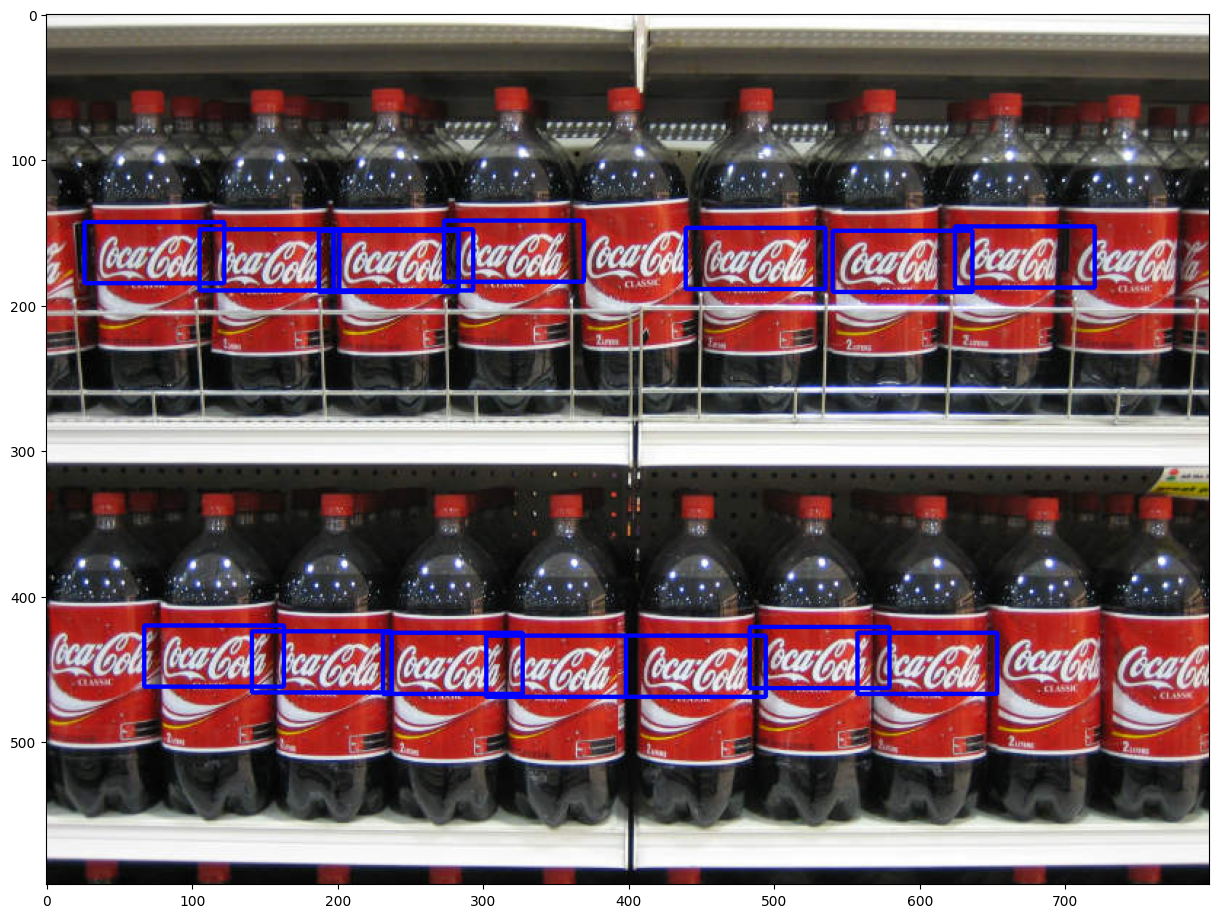

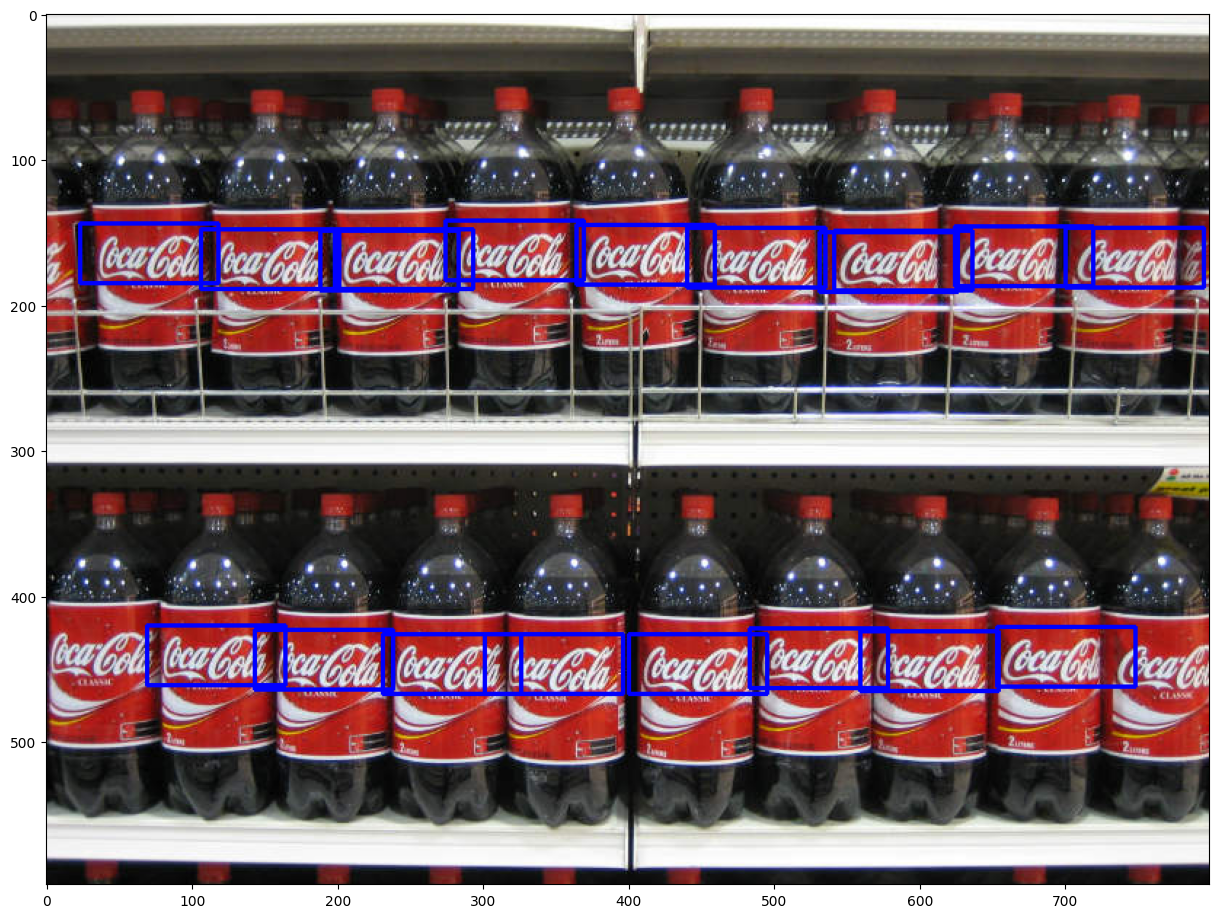

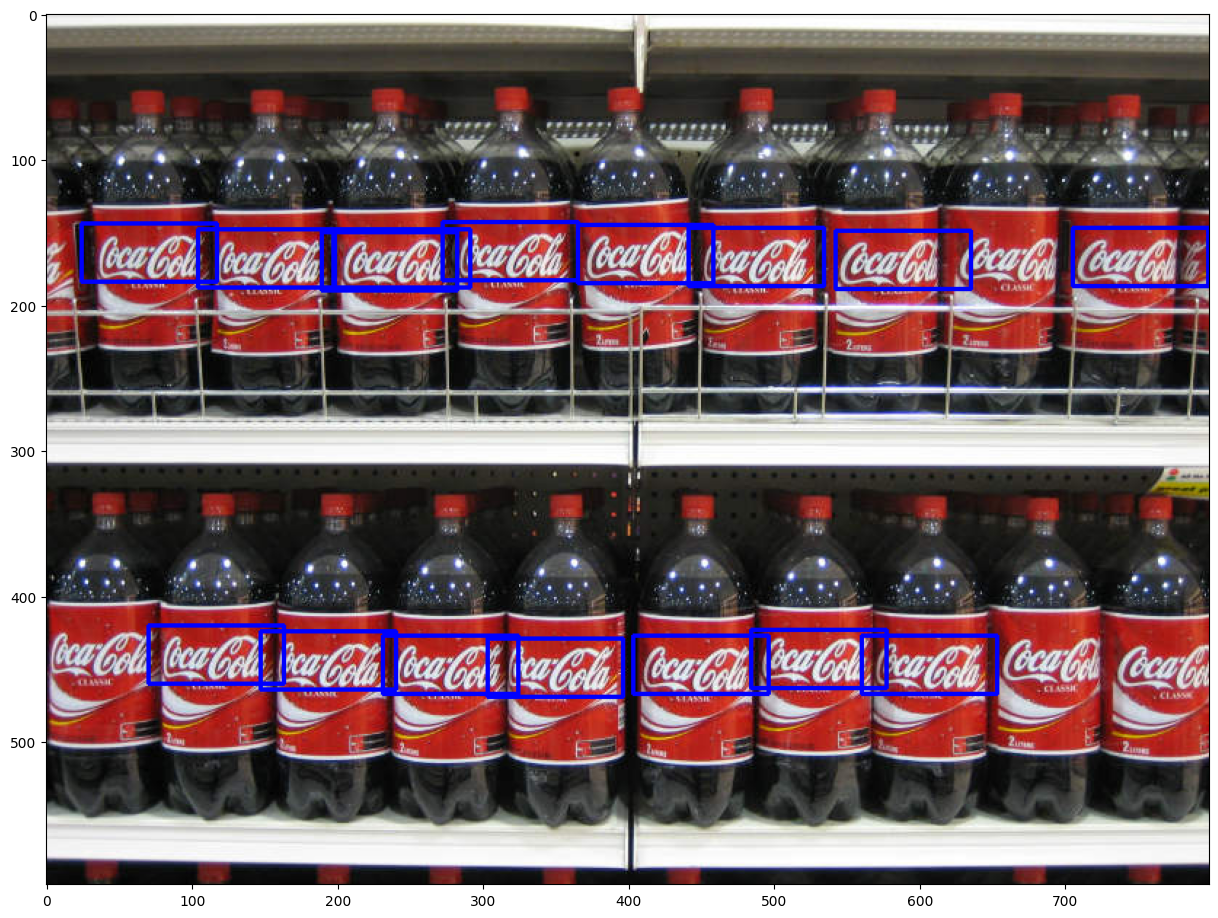

In [ ]:

def distance(p1, p2):
    return np.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

def sort_points(loc, min_distance):
    # Filtrar puntos cercanos
    filtered_loc = []
    for pt1 in loc:
        is_close = False
        for pt2 in filtered_loc:
            if distance(pt1, pt2) < min_distance:
                is_close = True
                break
        if not is_close:
            filtered_loc.append(pt1)
    return filtered_loc

img_multi = cv.imread('images/coca_multi.png')

#scales = [4, 4.25, 4.5, 4.75, 5]
scales = [4.15, 4.20, 4.30]
min_distance = 10
results = []
img_gray = cv.cvtColor(img_multi, cv.COLOR_BGR2GRAY)
img_resized_canny = cv.Canny(img_gray, 100, 200)


for scale in scales:

    img_resized = cv.resize(img_resized_canny, (int(img_multi.shape[1] * scale), int(img_multi.shape[0] * scale)))
    h_resized, w_resized = img_resized.shape[:2]
    if h_resized < img_multi.shape[0] or w_resized < img_multi.shape[1]:
        continue

    res = cv.matchTemplate(img_resized, template, cv.TM_CCOEFF)
    threshold = 0.7
    res_normalized = res / np.max(res)
    loc = np.where(res_normalized >= threshold)
    img_plot = img_multi.copy()
    
    filtered_loc = sort_points(zip(*loc[::-1]), min_distance*scale)

    for pt in filtered_loc:
        x, y = int(pt[0] / scale), int(pt[1] / scale)
        w_rectangle, h_rectangle = int(template.shape[1] / scale), int(template.shape[0] / scale)
        cv.rectangle(img_plot, (x, y), (x + w_rectangle, y + h_rectangle), (255, 0, 0), 2)
    results.append(res)
    plt.figure(figsize=(15, 15))
    plt.imshow(cv.cvtColor(img_plot, cv.COLOR_BGR2RGB))
    plt.show()

